<a href="https://colab.research.google.com/github/ankitkumarsingh1702/Implement-two-way-ANOVA-analysis/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os  # Module for interacting with the operating system (like handling file paths)
import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np  # Importing numpy for numerical operations and matrix calculations
from scipy import stats  # Importing scipy's stats module for statistical functions
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs (used for data visualization)


In [2]:
def compute_A_null_modified():
    # Create a matrix representing the null hypothesis, where the interaction effects are ignored
    # The matrix will be 48 rows (samples) x 4 columns (representing group factors)
    A_null_modified = [[0]*4 for _ in range(48)]  # Initialize a 48x4 matrix filled with zeros

    # Assign values to represent group memberships for each sample
    # For first 12 samples: Male Non-Smokers
    for i in range(12):
        A_null_modified[i][0] = 1  # Male
        A_null_modified[i][2] = 1  # Non-Smoker

    # For next 12 samples: Male Smokers
    for i in range(12, 24):
        A_null_modified[i][0] = 1  # Male
        A_null_modified[i][3] = 1  # Smoker

    # For next 12 samples: Female Non-Smokers
    for i in range(24, 36):
        A_null_modified[i][1] = 1  # Female
        A_null_modified[i][2] = 1  # Non-Smoker

    # For last 12 samples: Female Smokers
    for i in range(36, 48):
        A_null_modified[i][1] = 1  # Female
        A_null_modified[i][3] = 1  # Smoker

    return A_null_modified  # Return the completed matrix


In [3]:
def compute_A_modified():
    # Create a matrix representing the alternative hypothesis
    # The matrix will be 48 rows (samples) x 4 columns (representing specific group assignments)
    A_modified = [[0]*4 for _ in range(48)]  # Initialize a 48x4 matrix filled with zeros

    # Assign values for each group to represent distinct group memberships
    # First 12 samples: Male Non-Smokers
    for i in range(12):
        A_modified[i][0] = 1  # Male Non-Smoker group indicator

    # Next 12 samples: Male Smokers
    for i in range(12, 24):
        A_modified[i][1] = 1  # Male Smoker group indicator

    # Next 12 samples: Female Non-Smokers
    for i in range(24, 36):
        A_modified[i][2] = 1  # Female Non-Smoker group indicator

    # Last 12 samples: Female Smokers
    for i in range(36, 48):
        A_modified[i][3] = 1  # Female Smoker group indicator

    return A_modified  # Return the completed matrix


In [5]:
def calculate_F_statistics(A_null_mod, A_mod, dataset, scaling_factor):
    # Identity matrix of size 48x48, used for F-statistics calculation
    identity_matrix = np.identity(48)
    F_stat_list = []  # List to store calculated F-statistics

    # Compute the matrices for the F-statistics (numerator and denominator)
    numerator_matrix = identity_matrix - (np.matmul(np.matmul(A_null_mod, np.linalg.pinv(np.matmul(A_null_mod.T, A_null_mod))), A_null_mod.T))
    denominator_matrix = identity_matrix - (np.matmul(np.matmul(A_mod, np.linalg.pinv(np.matmul(A_mod.T, A_mod))), A_mod.T))

    # Loop through each row in the dataset to calculate F-statistics for each gene
    for _, row in dataset.iterrows():
        gene_values = np.array(row.iloc[1:49].to_numpy().tolist())  # Extract gene values for all 48 samples
        num_calc = np.matmul(gene_values.T, numerator_matrix)  # Calculate the numerator part
        denom_calc = np.matmul(gene_values.T, denominator_matrix)  # Calculate the denominator part
        F_value = ((np.matmul(num_calc, gene_values) / np.matmul(denom_calc, gene_values)) - 1) * scaling_factor  # Compute F-statistic value
        F_stat_list.append(F_value)  # Add F-statistic to the list

    return F_stat_list  # Return the list of F-statistics





Saving Raw Data_GeneSpring.txt to Raw Data_GeneSpring.txt


<ipython-input-5-259af6f59011>:15: RuntimeWarning: invalid value encountered in divide
  F_value = ((np.matmul(num_calc, gene_values) / np.matmul(denom_calc, gene_values)) - 1) * scaling_factor  # Compute F-statistic value


P-values generated


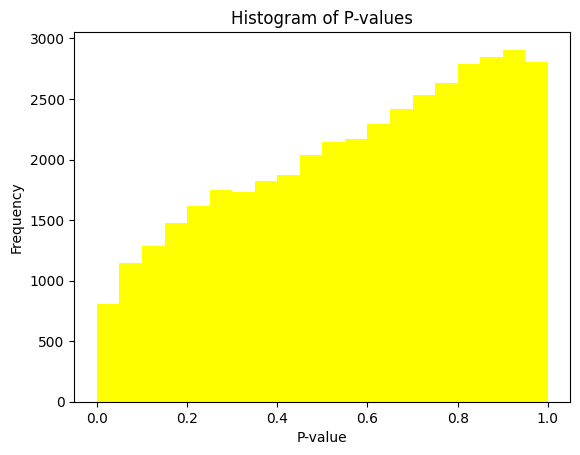

Histogram plotted for p-values


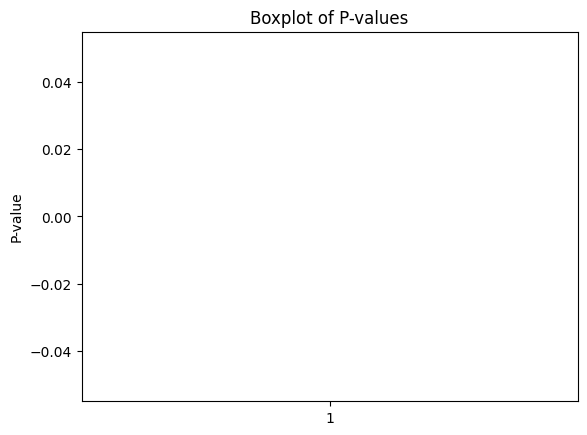

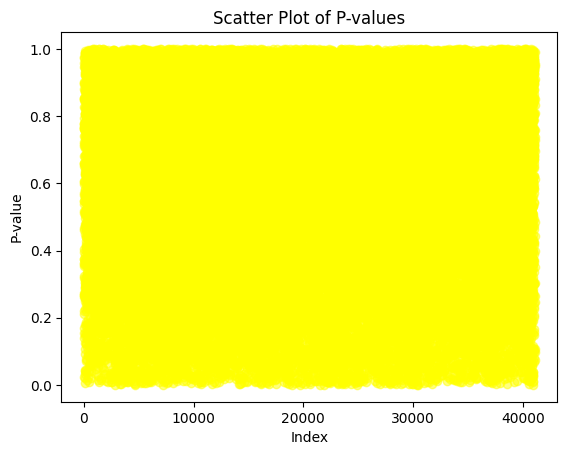

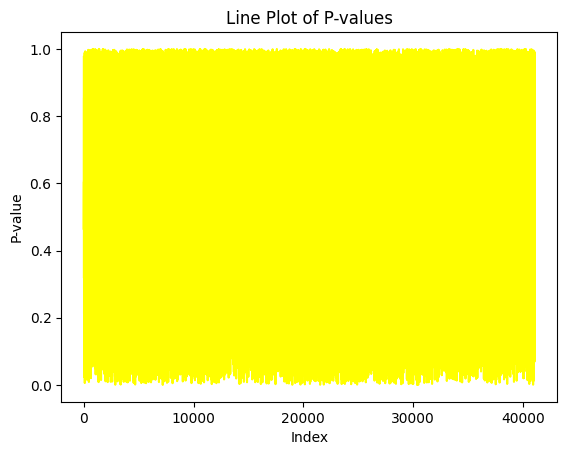

Additional graphs plotted for better understanding of p-value distribution


In [6]:
def main():
    # Step 1: Upload the file using Google Colab
    from google.colab import files
    uploaded = files.upload()  # Prompt the user to upload 'Raw Data_GeneSpring.txt'

    # Step 2: Load the data from the uploaded file
    data = pd.read_csv('Raw Data_GeneSpring.txt', delimiter='\t')  # Load the dataset as a DataFrame

    # Step 3: Compute A matrices for null and alternative hypotheses
    A_null_mod = compute_A_null_modified()  # Matrix for null hypothesis
    A_mod = compute_A_modified()  # Matrix for alternative hypothesis

    # Step 4: Calculate ranks of A_null and A matrices
    A_mod = np.matrix(A_mod)  # Convert to matrix form
    A_null_mod = np.matrix(A_null_mod)  # Convert to matrix form
    rank_A_null = np.linalg.matrix_rank(A_null_mod)  # Rank of A_null matrix
    rank_A = np.linalg.matrix_rank(A_mod)  # Rank of A matrix

    # Step 5: Calculate degrees of freedom and scaling factor
    scaling_factor = (48 - rank_A) / (rank_A - rank_A_null)  # Scaling factor for F-statistics

    # Step 6: Compute F-statistics for each gene
    F_stat_list = calculate_F_statistics(A_null_mod, A_mod, data, scaling_factor)

    # Step 7: Convert F-statistics from numpy array to list
    F_stat_list = np.array(F_stat_list).tolist()

    # Step 8: Extract scalar values from matrix elements (if they are wrapped)
    for i in range(len(F_stat_list)):
        F_stat_list[i] = F_stat_list[i][0]

    # Step 9: Calculate p-values using the F-distribution
    p_values = 1 - stats.f.cdf(F_stat_list, rank_A - rank_A_null, 48 - rank_A)

    # Step 10: Plotting the histogram of p-values
    print("P-values generated")
    plt.hist(p_values, bins=20, color='yellow')  # Plot histogram with yellow color
    plt.xlabel("P-value")
    plt.ylabel("Frequency")
    plt.title("Histogram of P-values")
    plt.show()
    print("Histogram plotted for p-values")

    # Additional Graphs
    # Boxplot of P-values to show distribution characteristics
    plt.boxplot(p_values, patch_artist=True, boxprops=dict(facecolor='yellow'))
    plt.title("Boxplot of P-values")
    plt.ylabel("P-value")
    plt.show()

    # Scatter plot of index vs. P-values to check any trend
    plt.scatter(range(len(p_values)), p_values, color='yellow', alpha=0.5)
    plt.xlabel("Index")
    plt.ylabel("P-value")
    plt.title("Scatter Plot of P-values")
    plt.show()

    # Line plot of P-values to visualize the trend across all genes
    plt.plot(range(len(p_values)), p_values, color='yellow')
    plt.xlabel("Index")
    plt.ylabel("P-value")
    plt.title("Line Plot of P-values")
    plt.show()

    print("Additional graphs plotted for better understanding of p-value distribution")

if __name__ == "__main__":
    main()
